# Road Object Detection using Fine-Tuned Pre-Trained Neural Networks 
**Advanced Intelligent Systems - Final Project**

*Group Members*
- Advincula, Andre Frederick
- Alvarez, Aaron Jetro
- Dee, Giann Wayne
- Gulinao, Lance Owen
- Laguna, Ivan Matthew
- Uy, Alec Matthew
- Verceles, Miguel Angelo




## Objectives

1. **Dataset Exploration and Understanding**  
   - Analyze the BDD100K dataset, focusing on object classes, distributions, and label properties, to assess its suitability for object detection tasks.

2. **Data Preprocessing and Preparation**  
   - Prepare images and annotations for YOLO by resizing, normalizing, and converting labels into YOLO-compatible formats to maximize model efficiency.

3. **Model Selection and Training**  
   - Fine-tune a YOLOv8 model (initially pre-trained on a generic dataset) for specific road object detection tasks, adjusting parameters like batch size, image size, and number of epochs to optimize performance on the BDD100K dataset.

4. **Evaluation and Analysis of Detection Performance**  
   - Evaluate the YOLO model’s object detection accuracy using metrics like mAP (mean Average Precision), precision, and recall, comparing pre- and post-fine-tuning results.

5. **Insights on YOLOv8 Fine-Tuning**  
   - Document findings on how fine-tuning parameters influence YOLO's ability to detect road objects, identifying challenges and potential improvements for future work.

6. **Comparison with Benchmark Models (if applicable)**  
   - Optionally, compare YOLO’s detection performance with other state-of-the-art models to contextualize results and highlight YOLO’s strengths and limitations.


# 1) Importing Libraries and data set

### Installing and Importing libraries for the modelling process

In [ ]:
#Importing necessary libraries

from ultralytics import YOLO
import matplotlib.pyplot as plt
import kagglehub
from pathlib import Path
import seaborn as sns
from tqdm import tqdm
import cv2
import os
import json
import tensorflow as tf
import exploratorymethod as em
import bddtools as bt
import metrictools as mt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, precision_recall_curve

### Downloading the dataset

In [2]:

# Download latest version of the dataset, if the download stops/faces an error, you can rerun and it will continue to download.
path = kagglehub.dataset_download("solesensei/solesensei_bdd100k")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Aaron\.cache\kagglehub\datasets\solesensei\solesensei_bdd100k\versions\2


### Specifying paths for easier access in the notebook

Before proceeding, make sure that you have a folder named "dataset". For easier access I recommmend that you put it in the same directory as where your notebook is located. 

**Some notes**
 - For now, your labels will only have the .json files as it will be converted automatically using this notebook.
 - dataset.yaml must be created manually in the same folder where your notebook is located. A copy is provided in the repository as well

![File Structure](file%20structure.png)



In [ ]:
# Paths to JSON annotation files and output label directories. Specify the path of the labels.json here
annotations_train_path = r"C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\bdd100k_labels_images_train.json"
annotations_val_path = r"C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\bdd100k_labels_images_val.json"

# Updated output directories for converted YOLO labels. this must point to the labels folder specified in the previous cell block.
output_labels_train_path = r"C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\train"
output_labels_val_path = r"C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\val"
image_width, image_height = 1280, 720

class_mapping = {
    "car": 0,
    "truck": 1,
    "bus": 2,
    "motorcycle": 3,
    "bicycle": 4,
    "pedestrian": 5,
    "traffic light": 6,
    "traffic sign": 7,
    "train": 8,
    "rider": 9
}

# 2) Exploratory Data Analysis

### User Defined Methods

### Preprocessing Data For EDA

In [ ]:
# Converting BDD100k data labels to YOLO Format

bt.convert_annotations_to_yolo(
    annotations_train_path, 
    annotations_val_path, 
    output_labels_train_path, 
    output_labels_val_path, 
    image_width, 
    image_height, 
    class_mapping
)

In [ ]:
# Making a dataframe copy of YOLO labels for EDA

train_labels_df = bt.yolo_labels_to_dataframe(output_labels_train_path, image_width, image_height)
val_labels_df = bt.yolo_labels_to_dataframe(output_labels_val_path, image_width, image_height)

# Display the first few rows of the DataFrames
print("Train Labels:")
print(train_labels_df.head())
print("\nValidation Labels:")
print(val_labels_df.head())

### Data Metrics

In [ ]:
em.plot_class_distribution(train_labels_df, val_labels_df, class_mapping)

In [ ]:
em.plot_bbox_size_distribution(train_labels_df, val_labels_df)

In [ ]:
em.plot_aspect_ratio_distribution(train_labels_df, val_labels_df)

In [ ]:
em.plot_bbox_area_distribution(train_labels_df, val_labels_df)

In [ ]:
em.analyze_time_of_day(annotations_train_path)

## Running a Pretrained Model To CHECK if dataset and models have been imported properly


### YOLO V8


image 1/1 C:\Users\Aaron\Jupyter\FinalProj\dataset\images\val\b1c66a42-6f7d68ca.jpg: 384x640 12 cars, 1 truck, 138.0ms
Speed: 6.0ms preprocess, 138.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


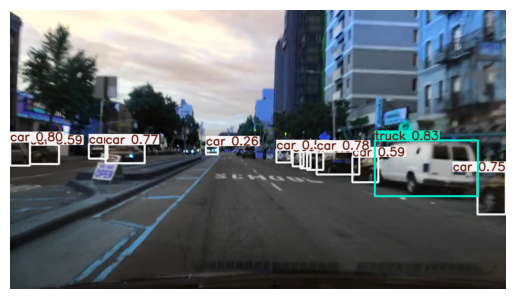

In [25]:

# Load a pre-trained YOLOv8 model (choose from "yolov8n.pt", "yolov8s.pt", "yolov8m.pt", "yolov8l.pt", "yolov8x.pt" based on your requirements)
model = YOLO("yolov8n.pt")  # "yolov8n.pt" is the nano model, which is fastest but least accurate

# Run inference on an image (replace with your image path)
results = model("dataset/images/val/b1c66a42-6f7d68ca.jpg")

# Display results
for result in results:
    boxes = result.boxes
    plt.imshow(result.plot())
    plt.axis("off")
    plt.show()


### YOLO V5

100%|██████████████████████████████████████████████████████████████████████████████| 17.7M/17.7M [00:00<00:00, 101MB/s]



image 1/1 C:\Users\Aaron\Jupyter\FinalProj\dataset\images\val\b1c66a42-6f7d68ca.jpg: 384x640 13 cars, 1 truck, 90.0ms
Speed: 2.0ms preprocess, 90.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


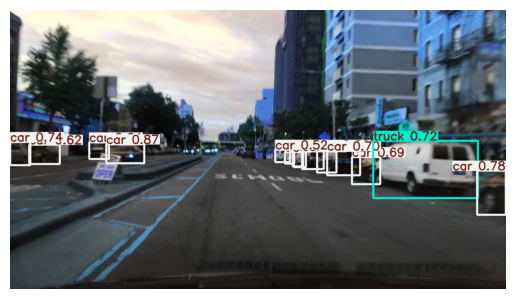

In [5]:
from ultralytics import YOLO

# Load the pre-trained YOLOv5 model
model = YOLO("yolov5su.pt")  # replace with your desired model size

# Perform inference on a single image
results = model("dataset/images/val/b1c66a42-6f7d68ca.jpg")

# Display results
for result in results:
    boxes = result.boxes
    plt.imshow(result.plot())
    plt.axis("off")
    plt.show()



## Attempt to finetune the model to check if labels have been converted to yaml format properrly

### User Defined Methods

### Pre-Trained Models

In [6]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (e.g., yolov8n.pt, yolov8s.pt, etc.)
model = YOLO("yolov8n.pt")  # You can choose different versions depending on the speed and accuracy you need

# Train the model with the updated syntax
model.train(
    data="dataset.yaml",  # Path to your custom dataset.yaml file
    epochs=5,            # Number of training epochs
    imgsz=640,            # Image size (YOLO generally works well with 640 or 1280)
    batch=32,              # Set batch size (e.g., 8) to control memory usage
    project="runs/train", # Directory where training results will be saved
    name="finetuned_model", # Folder name for saving the model
    exist_ok=True         # Overwrite existing run folder
)


Ultralytics 8.3.37  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=5, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=finetuned_model, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

train: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\train... 1995 images, 5 backgrounds, 0 corrupt: 100%|██


train: New cache created: C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\train.cache


val: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\val... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████


val: New cache created: C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\val.cache
Plotting labels to runs\train\finetuned_model\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\train\finetuned_model
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G        1.7       2.59      1.107        414        640: 100%|██████████| 63/63 [09:33<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:49


                   all       1500      25316     0.0354      0.311      0.125     0.0739

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.565      1.408      1.072        489        640: 100%|██████████| 63/63 [09:39<00:00,  9.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:51


                   all       1500      25316      0.682      0.163        0.2      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.528      1.301      1.057        361        640: 100%|██████████| 63/63 [09:03<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:39


                   all       1500      25316       0.56       0.23      0.203      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.502      1.231      1.045        355        640: 100%|██████████| 63/63 [08:49<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:35


                   all       1500      25316       0.61      0.236      0.227      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.452      1.157      1.031        475        640: 100%|██████████| 63/63 [08:47<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:34


                   all       1500      25316      0.497      0.267      0.258      0.151

5 epochs completed in 0.916 hours.
Optimizer stripped from runs\train\finetuned_model\weights\last.pt, 6.2MB
Optimizer stripped from runs\train\finetuned_model\weights\best.pt, 6.2MB

Validating runs\train\finetuned_model\weights\best.pt...
Ultralytics 8.3.37  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:13


                   all       1500      25316      0.496      0.267      0.258      0.151
                   car       1484      15066      0.526      0.613      0.606       0.36
                 truck        395        634      0.519      0.301       0.32      0.218
                   bus        171        206      0.481      0.315      0.301      0.237
         traffic light        854       4111      0.412      0.251      0.234     0.0787
          traffic sign       1225       5222      0.387      0.346      0.298      0.146
                 train          2          2          1          0          0          0
                 rider         61         75       0.15       0.04     0.0463       0.02
Speed: 1.4ms preprocess, 36.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs\train\finetuned_model


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000181F7C6DA60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

In [ ]:
mt.plot_yolo_metrics("runs/train/finetuned_model/results.csv")


image 1/1 C:\Users\Aaron\Jupyter\FinalProj\dataset\images\val\b1c66a42-6f7d68ca.jpg: 384x640 18 cars, 3 traffic signs, 35.0ms
Speed: 1.0ms preprocess, 35.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


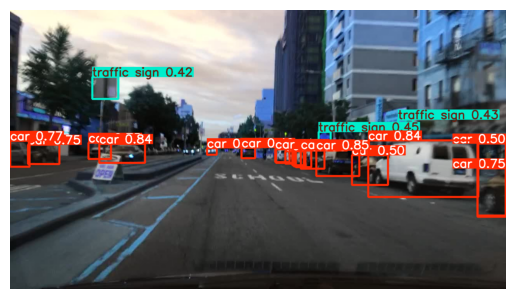

In [11]:
# Load the fine-tuned model
fine_tuned_model = YOLO("runs/train/finetuned_model/weights/best.pt")

# Run inference on a test image
results = fine_tuned_model("dataset/images/val/b1c66a42-6f7d68ca.jpg")

for result in results:
    result.show()
# Display results
for result in results:
    boxes = result.boxes
    plt.imshow(result.plot())
    plt.axis("off")
    plt.show()



In [12]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (e.g., yolov8n.pt, yolov8s.pt, etc.)
model2 = YOLO("yolov8n.pt")  # You can choose different versions depending on the speed and accuracy you need

# Train the model with the updated syntax
model2.train(
    data="dataset.yaml",  # Path to your custom dataset.yaml file
    epochs=5,            # Number of training epochs
    imgsz=640,            # Image size (YOLO generally works well with 640 or 1280)
    batch=16,              # Set batch size (e.g., 8) to control memory usage
    project="runs/train", # Directory where training results will be saved
    name="finetuned_model2", # Folder name for saving the model
    exist_ok=True         # Overwrite existing run folder
)


Ultralytics 8.3.37  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=dataset.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=finetuned_model2, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\train.cache... 1995 images, 5 backgrounds, 0 corrupt: 1
val: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\val.cache... 1500 images, 0 backgrounds, 0 corrupt: 100%|


Plotting labels to runs\train\finetuned_model2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\train\finetuned_model2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.689      2.323      1.107        491        640: 100%|██████████| 125/125 [08:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:31


                   all       1500      25316      0.579      0.175      0.165     0.0926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G       1.56      1.399      1.067        445        640: 100%|██████████| 125/125 [08:07<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:29


                   all       1500      25316      0.575      0.213      0.191      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.543       1.31      1.058        378        640: 100%|██████████| 125/125 [08:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:24


                   all       1500      25316       0.59      0.216      0.212      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.508      1.228      1.046        324        640: 100%|██████████| 125/125 [08:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:24


                   all       1500      25316      0.625      0.242      0.248      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.457      1.156      1.029        622        640: 100%|██████████| 125/125 [08:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:24


                   all       1500      25316      0.461      0.259       0.25      0.144

5 epochs completed in 0.809 hours.
Optimizer stripped from runs\train\finetuned_model2\weights\last.pt, 6.2MB
Optimizer stripped from runs\train\finetuned_model2\weights\best.pt, 6.2MB

Validating runs\train\finetuned_model2\weights\best.pt...
Ultralytics 8.3.37  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:08


                   all       1500      25316      0.461      0.258      0.251      0.144
                   car       1484      15066      0.593      0.588      0.616      0.364
                 truck        395        634      0.456      0.273      0.251      0.158
                   bus        171        206      0.254      0.393      0.306      0.243
         traffic light        854       4111      0.469       0.23      0.237     0.0773
          traffic sign       1225       5222      0.451      0.323      0.302      0.146
                 train          2          2          1          0          0          0
                 rider         61         75          0          0     0.0422     0.0191
Speed: 0.9ms preprocess, 34.0ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs\train\finetuned_model2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000181F951A330>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

In [ ]:
mt.plot_yolo_metrics("runs/train/finetuned_model2/results.csv")


image 1/1 C:\Users\Aaron\Jupyter\FinalProj\dataset\images\val\b1c66a42-6f7d68ca.jpg: 384x640 17 cars, 3 traffic signs, 38.0ms
Speed: 2.0ms preprocess, 38.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


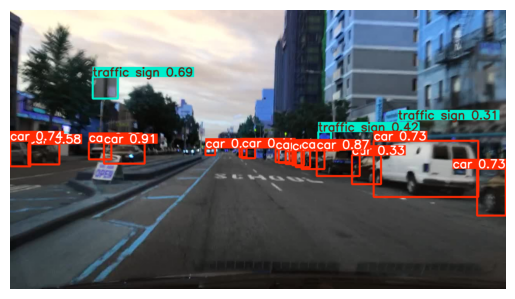

In [14]:
# Load the fine-tuned model
fine_tuned_model2 = YOLO("runs/train/finetuned_model2/weights/best.pt")

# Run inference on a test image
results = fine_tuned_model2("dataset/images/val/b1c66a42-6f7d68ca.jpg")

for result in results:
    result.show()
# Display results
for result in results:
    boxes = result.boxes
    plt.imshow(result.plot())
    plt.axis("off")
    plt.show()



In [15]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (e.g., yolov8n.pt, yolov8s.pt, etc.) this time we're using the learned weights from the first model
model3 = YOLO("runs/train/finetuned_model/weights/best.pt")  # You can choose different versions depending on the speed and accuracy you need

# Train the model with the updated syntax
model3.train(
    data="dataset.yaml",  # Path to your custom dataset.yaml file
    epochs=10,            # Number of training epochs
    imgsz=640,            # Image size (YOLO generally works well with 640 or 1280)
    batch=32,              # Set batch size (e.g., 8) to control memory usage
    project="runs/train", # Directory where training results will be saved
    name="finetuned_model3", # Folder name for saving the model
    exist_ok=True         # Overwrite existing run folder
)


Ultralytics 8.3.37  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=runs/train/finetuned_model/weights/best.pt, data=dataset.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=finetuned_model3, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fals

train: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\train.cache... 1995 images, 5 backgrounds, 0 corrupt: 1
val: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\val.cache... 1500 images, 0 backgrounds, 0 corrupt: 100%|


Plotting labels to runs\train\finetuned_model3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\train\finetuned_model3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.486      1.254      1.034        250        640: 100%|██████████| 63/63 [08:47<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:51


                   all       1500      25316      0.461      0.262      0.241      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.502      1.222      1.039        287        640: 100%|██████████| 63/63 [08:37<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:37


                   all       1500      25316      0.522      0.245      0.242      0.136

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.514      1.206      1.045        261        640: 100%|██████████| 63/63 [08:29<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:35


                   all       1500      25316       0.29      0.239      0.206      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.521      1.178      1.048        263        640: 100%|██████████| 63/63 [08:30<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:36


                   all       1500      25316      0.358      0.263      0.247      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.501      1.127       1.04        309        640: 100%|██████████| 63/63 [08:30<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:39


                   all       1500      25316      0.414      0.257       0.25      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.469      1.084      1.028        277        640: 100%|██████████| 63/63 [08:32<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:37


                   all       1500      25316      0.362      0.288      0.266      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.451      1.044       1.02        287        640: 100%|██████████| 63/63 [08:27<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:36


                   all       1500      25316      0.398      0.269      0.267      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      1.433      1.019      1.011        261        640: 100%|██████████| 63/63 [08:26<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:35


                   all       1500      25316      0.394      0.284      0.278      0.158

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      1.407     0.9857      1.002        268        640: 100%|██████████| 63/63 [08:23<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:35


                   all       1500      25316      0.434      0.304      0.292      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      1.397     0.9596     0.9974        238        640: 100%|██████████| 63/63 [08:25<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:35


                   all       1500      25316      0.419      0.299      0.302      0.174

10 epochs completed in 1.711 hours.
Optimizer stripped from runs\train\finetuned_model3\weights\last.pt, 6.2MB
Optimizer stripped from runs\train\finetuned_model3\weights\best.pt, 6.2MB

Validating runs\train\finetuned_model3\weights\best.pt...
Ultralytics 8.3.37  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:13


                   all       1500      25316      0.433      0.294      0.302      0.174
                   car       1484      15066      0.609      0.615      0.641      0.381
                 truck        395        634      0.511      0.329      0.351      0.241
                   bus        171        206      0.361      0.374      0.332      0.263
         traffic light        854       4111      0.506      0.296      0.303        0.1
          traffic sign       1225       5222      0.576      0.322      0.349      0.172
                 train          2          2          0          0          0          0
                 rider         61         75      0.464       0.12      0.138     0.0586
Speed: 1.4ms preprocess, 37.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\train\finetuned_model3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001820BAD6060>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

In [ ]:
mt.plot_yolo_metrics("runs/train/finetuned_model3/results.csv")


image 1/1 C:\Users\Aaron\Jupyter\FinalProj\dataset\images\val\b1c66a42-6f7d68ca.jpg: 384x640 22 cars, 3 traffic signs, 37.0ms
Speed: 1.0ms preprocess, 37.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


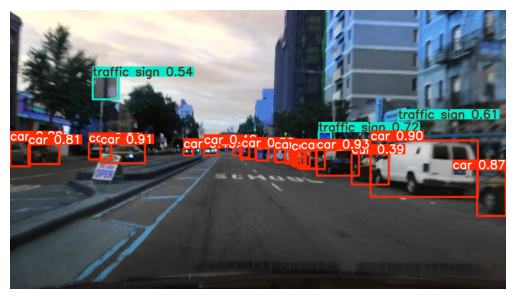

In [18]:
# Load the fine-tuned model
fine_tuned_model3 = YOLO("runs/train/finetuned_model3/weights/best.pt")

# Run inference on a test image
results = fine_tuned_model3("dataset/images/val/b1c66a42-6f7d68ca.jpg")

for result in results:
    result.show()
# Display results
for result in results:
    boxes = result.boxes
    masks = result.masks
    plt.imshow(result.plot())
    plt.axis("off")
    plt.show()



In [38]:
model3.val()

Ultralytics 8.3.37  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\val.cache... 1500 images, 0 backgrounds, 0 corrupt: 100%|
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:14


                   all       1500      25316      0.433      0.294      0.302      0.174
                   car       1484      15066      0.609      0.615      0.641      0.381
                 truck        395        634      0.511      0.329      0.351      0.241
                   bus        171        206      0.361      0.374      0.332      0.263
         traffic light        854       4111      0.506      0.296      0.303        0.1
          traffic sign       1225       5222      0.576      0.322      0.349      0.172
                 train          2          2          0          0          0          0
                 rider         61         75      0.464       0.12      0.138     0.0586
Speed: 0.9ms preprocess, 33.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\train\finetuned_model3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000018336AE97C0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model (e.g., yolov8n.pt, yolov8s.pt, etc.) this time we're using the learned weights from the first model
model4 = YOLO("yolov8s.pt")  # You can choose different versions depending on the speed and accuracy you need

# Train the model with the updated syntax
model4.train(
    data="dataset.yaml",  # Path to your custom dataset.yaml file
    epochs=10,            # Number of training epochs
    imgsz=640,            # Image size (YOLO generally works well with 640 or 1280)
    batch=32,              # Set batch size (e.g., 8) to control memory usage
    project="runs/train", # Directory where training results will be saved
    name="finetuned_model4", # Folder name for saving the model
    exist_ok=True         # Overwrite existing run folder
)


100%|██████████████████████████████████████████████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 116MB/s]


New https://pypi.org/project/ultralytics/8.3.38 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.37  Python-3.12.3 torch-2.5.1+cpu CPU (AMD Ryzen 7 5700G with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=dataset.yaml, epochs=10, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/train, name=finetuned_model4, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

train: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\train.cache... 1995 images, 5 backgrounds, 0 corrupt: 1
val: Scanning C:\Users\Aaron\Jupyter\FinalProj\dataset\labels\val.cache... 1500 images, 0 backgrounds, 0 corrupt: 100%|


Plotting labels to runs\train\finetuned_model4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\train\finetuned_model4
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G       1.61      2.465      1.114        254        640: 100%|██████████| 63/63 [20:22<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [03:24


                   all       1500      25316      0.629      0.225      0.229      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.496       1.17      1.057        281        640: 100%|██████████| 63/63 [20:40<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [03:13


                   all       1500      25316      0.463      0.282      0.247       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.466      1.062      1.042        255        640: 100%|██████████| 63/63 [21:33<00:00, 20.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [03:05


                   all       1500      25316       0.32      0.268      0.237      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.463      1.032      1.049        258        640: 100%|██████████| 63/63 [20:22<00:00, 19.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [03:06


                   all       1500      25316      0.389      0.289      0.282      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.443     0.9762      1.034        306        640: 100%|██████████| 63/63 [19:12<00:00, 18.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [03:08


                   all       1500      25316      0.389      0.307       0.29      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G        1.4     0.9317      1.018        269        640: 100%|██████████| 63/63 [19:10<00:00, 18.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [03:07


                   all       1500      25316       0.42      0.316      0.314      0.178

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.373     0.8904      1.009        555        640:  75%|███████▍  | 47/63 [15:35<05:09, 19.